In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load the datasets and Create an ExcelFile object
from google.colab import drive
drive.mount('/content/drive')
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Branch-Cleaned.csv')

In [ ]:
#Initial check
print(Data.head(5))
print('\n')
print(Data.dtypes)
print('\n')
print(Data.info())

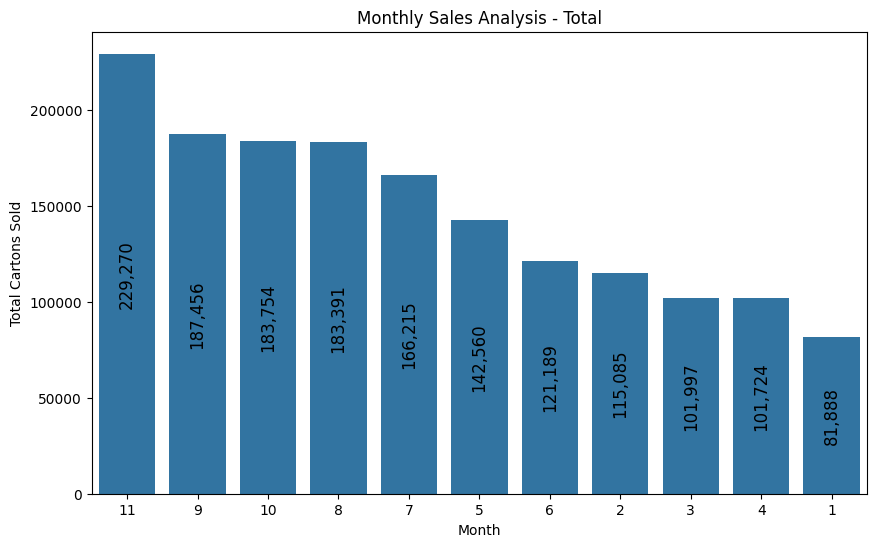

In [4]:
#Monthly Sales Analysis

MonthlySales = Data.groupby('MonthNumeric')['Cartons'].sum().reset_index()
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Sort the DataFrame by 'Cartons' in descending order
MonthlySales = MonthlySales.sort_values(by='Cartons', ascending=False)

#Reorder the categories in Seaborn's barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='MonthNumeric', y='Cartons', data=MonthlySales, order=MonthlySales['MonthNumeric'])

#Add rotated text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='center', fontsize=12, rotation=90)

#Titles and labels
plt.title('Monthly Sales Analysis - Total')
plt.xlabel('Month')
plt.ylabel('Total Cartons Sold')
plt.show()

In [7]:
#Seasonal Sales Analysis

#Define seasons based on MonthNumeric
def AssignSeason(month):
  if month in [1, 2, 3]:
    return 'Season 1 (Spring)'
  if month in [4, 5, 6]:
    return 'Season 2 (Summer)'
  if month in [7, 8, 9]:
    return 'Season 3 (Autumn)'
  if month in [10, 11, 12]:
    return 'Season 4 (Winter)'
  else:
    return 'Unknown'

#Apply the function to create a new column
Data['Season'] = Data['MonthNumeric'].apply(AssignSeason)

#Group by Season and calculate cartons
SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
SeasonalSales["Cartons"] = SeasonalSales["Cartons"].apply(lambda x: f"{x:,}")

print(SeasonalSales)

              Season              Cartons
2  Season 3 (Autumn)   537,064.5316666666
3  Season 4 (Winter)          413,025.212
1  Season 2 (Summer)   365,475.0416666667
0  Season 1 (Spring)  298,970.67333333334


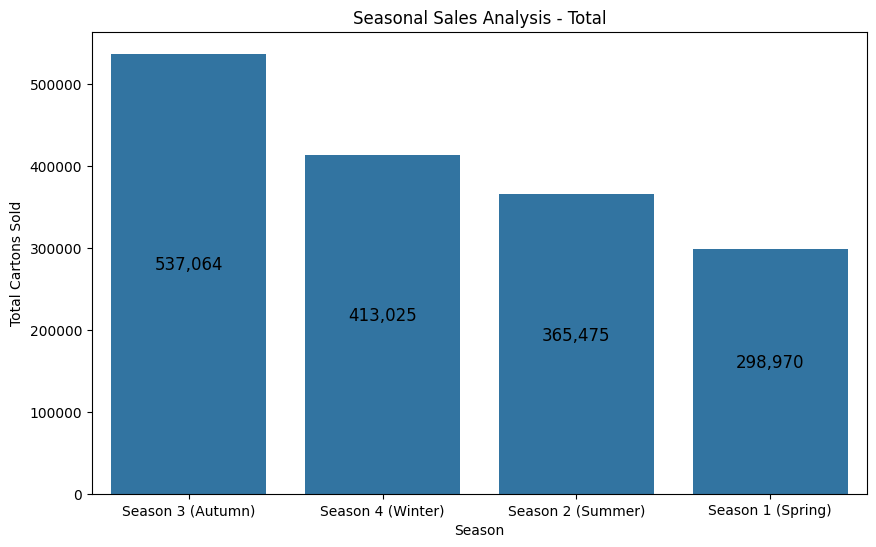

In [9]:
#Seasonal Sales Analysis - Plot

SeasonalSales = Data.groupby('Season')['Cartons'].sum().reset_index()
SeasonalSales = SeasonalSales.sort_values(by='Cartons', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Season', y='Cartons', data=SeasonalSales)

#Add text on top of each bar
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f"{int(bar.get_height()):,}",
             ha='center', va='bottom', fontsize=12)

#Titles and labels
plt.title('Seasonal Sales Analysis - Total')
plt.xlabel('Season')
plt.ylabel('Total Cartons Sold')
plt.show()

In [23]:
#Top States + Portion of Sales (Cartons)

TopStates = Data.groupby('State')['Cartons'].sum().reset_index()
TopStates = TopStates.sort_values(by='Cartons', ascending=False)

#Calculate total sales
total_sales = TopStates['Cartons'].sum()

#Calculate portion of sales and format
TopStates['Portion'] = (TopStates['Cartons'] / total_sales) * 100
TopStates['Portion'] = TopStates['Portion'].apply(lambda x: f"{x:.2f}%")
TopStates["Cartons"] = TopStates["Cartons"].apply(lambda x: f"{x:,}")

TopStates_styled = TopStates[['State', 'Cartons', 'Portion']].style.set_caption("Top States and Portion of Sales").set_properties(**{'text-align': 'left'})
display(TopStates_styled)

,State,Cartons,Portion
18,گیلان,"1,152,638.0",71.39%
4,اهواز,"209,169.0",12.96%
8,شوشتر,"77,115.0",4.78%
15,کریمی,"29,345.0",1.82%
9,مازندران,"28,064.0",1.74%
13,کبیر پویان,"21,642.75",1.34%
3,اصفهان,"19,283.0",1.19%
2,ارومیه,"18,756.0",1.16%
1,اردبیل,"16,638.0",1.03%
0,اراک,"9,307.0",0.58%


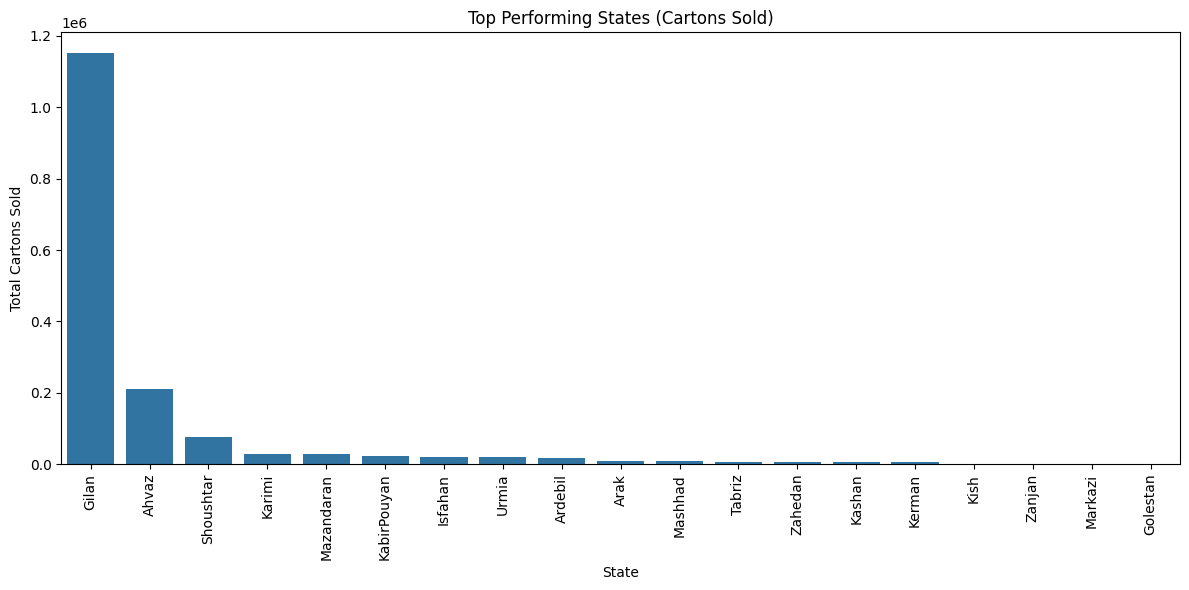

In [19]:
#Top Perform States Plot

#State Label Renaming
state_labels = {
    'زاهدان': 'Zahedan',
    'تبریز': 'Tabriz',
    'زنجان': 'Zanjan',
    'اصفهان': 'Isfahan',
    'ارومیه': 'Urmia',
    'اراک': 'Arak',
    'مرکزی': 'Markazi',
    'اردبیل': 'Ardebil',
    'کریمی': 'Karimi',
    'کرمان': 'Kerman',
    'کبیر پویان': 'KabirPouyan',
    'شوشتر': 'Shoushtar',
    'مشهد': 'Mashhad',
    'اهواز': 'Ahvaz',
    'گلستان': 'Golestan',
    'کاشان': 'Kashan',
    'گیلان': 'Gilan',
    'مازندران': 'Mazandaran',
    'کیش': 'Kish',}

Data['State_English'] = Data['State'].map(state_labels).fillna(Data['State'])

#Top Performing States Analysis
TopStates = Data.groupby('State_English')['Cartons'].sum().reset_index()
TopStates = TopStates.sort_values(by='Cartons', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='State_English', y='Cartons', data=TopStates)
plt.title('Top Performing States (Cartons Sold)')
plt.xlabel('State')
plt.ylabel('Total Cartons Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [22]:
#Top Product Group + Portion of Sales

#Group by ProductGroup and calculate total cartons sold
ProductGroupSales = Data.groupby('ProductGroup')['Cartons'].sum().reset_index()

#Calculate total sales
total_sales = ProductGroupSales['Cartons'].sum()

#Calculate portion of sales and format
ProductGroupSales['Portion'] = (ProductGroupSales['Cartons'] / total_sales) * 100
ProductGroupSales['Portion'] = ProductGroupSales['Portion'].apply(lambda x: f"{x:.2f}%")

#Sort Values
ProductGroupSales = ProductGroupSales.sort_values(by='Cartons', ascending=False)

#Display the table using pandas styling
ProductGroupSales_styled = ProductGroupSales.style.set_caption("Top Product Groups and Portion of Sales").set_properties(**{'text-align': 'left'})
display(ProductGroupSales_styled)

,ProductGroup,Cartons,Portion
3,رب,1504411.208667,93.18%
5,کنسرو,75470.416667,4.67%
4,سس,24384.500000,1.51%
7,کنسرو گوجه فرنگی,10236.583333,0.63%
2,کنسرو,17.000000,0.00%
0,رب,8.750000,0.00%
6,کنسرو,6.000000,0.00%
1,سس,1.000000,0.00%


In [25]:
#Top Product + Portion of Sales
# Top Product + Portion of Sales

# Group by Product and calculate total cartons sold
ProductSales = Data.groupby('ProductName')['Cartons'].sum().reset_index()

# Calculate total sales
total_sales = ProductSales['Cartons'].sum()

# Calculate portion of sales and format
ProductSales['Portion'] = (ProductSales['Cartons'] / total_sales) * 100
ProductSales['Portion'] = ProductSales['Portion'].apply(lambda x: f"{x:.2f}%")

#Sort Values
ProductSales = ProductSales.sort_values(by='Cartons', ascending=False)

# Display the table using pandas styling
ProductSales_styled = ProductSales.style.set_caption("Top Products and Portion of Sales").set_properties(**{'text-align': 'left'})
display(ProductSales_styled)  # Display the styled table using 'display' in Colab

,ProductName,Cartons,Portion
2,(21002) رب قوطي 800 گرم آسان بازشو روژين,898779.000000,55.67%
156,روژین رب قوطی 800گ قرمز کلیدی,192685.000000,11.93%
3,(21003) رب قوطي 400گرم آسان بازشو روژين,82133.000000,5.09%
32,رب گوجه 800گ کلیدی روژین (قرمز),66443.000000,4.12%
1,(21001) رب شيشه 680 گرم روژين,63291.000000,3.92%
12,(21016) کنسرو لوبيا چيتي 420گرم روژين,25203.000000,1.56%
70,رب گوجه قوطی کلیددار 800 گرمی روژین تاک,22994.000000,1.42%
19,(21024) رب شيشه 1550گرمي روژين,19204.000000,1.19%
62,رب گوجه فرنگی 800 گرم روژین کلیددار12عددی,17515.000000,1.08%
41,رب گوجه فرنگي 800 گرمي قوطي آسان باز روژين,15929.000000,0.99%


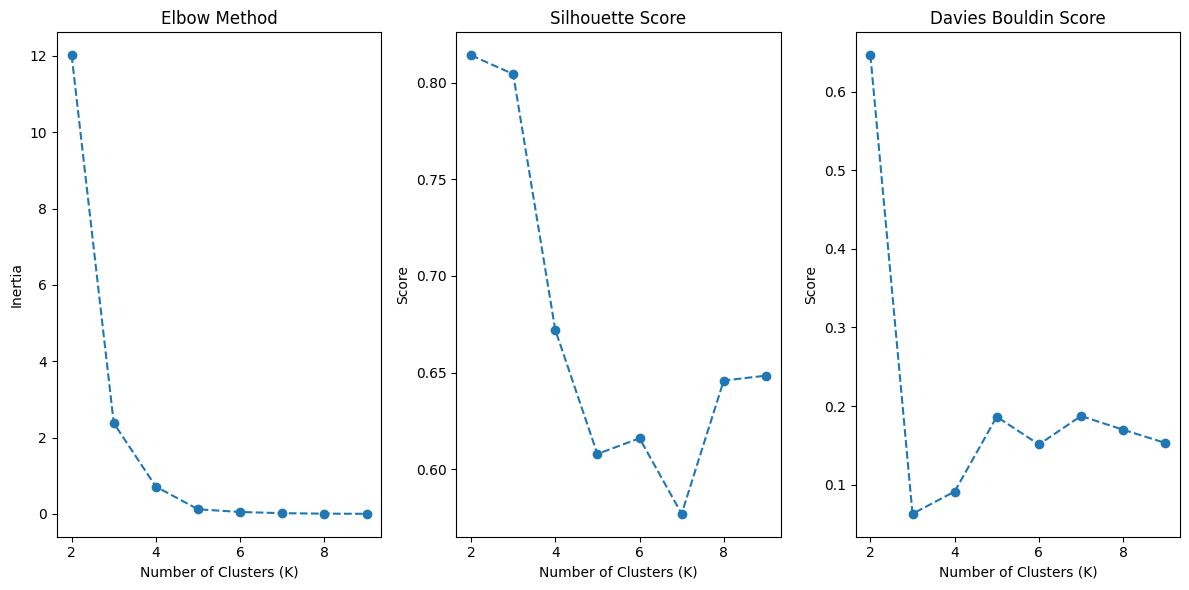

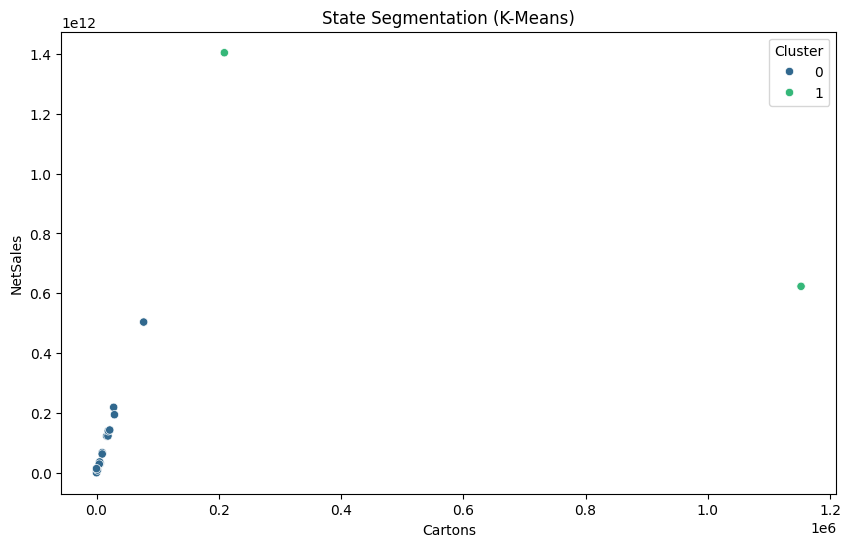

In [26]:
#Apply K-Means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Selecting customer data
CustomerData = Data.groupby('State')[['Cartons', 'NetSales']].sum().reset_index()

# Normalize data
scaler = StandardScaler()
ScaledData = scaler.fit_transform(CustomerData[['Cartons', 'NetSales']])

# Determine optimal clusters (elbow method and silhouette score)
optimal = []
silhouette_scores = []
davies_bouldin_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(ScaledData)
    optimal.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(ScaledData, labels))
    davies_bouldin_scores.append(davies_bouldin_score(ScaledData, labels))

# Plot the elbow curve, silhouette scores, and Davies-Bouldin scores
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(range(2, 10), optimal, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.subplot(1, 3, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o', linestyle='--')
plt.title('Davies Bouldin Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# Apply K-Means clustering with the chosen number of clusters
chosen_k = 2  # You might need to adjust this based on the plots
kmeans = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
CustomerData['Cluster'] = kmeans.fit_predict(ScaledData)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=CustomerData, x='Cartons', y='NetSales', hue='Cluster', palette='viridis')
plt.title('State Segmentation (K-Means)')
plt.xlabel('Cartons')
plt.ylabel('NetSales')
plt.show()